In [15]:
import pandas as pd


In [16]:
df=pd.read_csv("labeled_level1.csv")

In [17]:
df.head()

,from,sender_domain,clean_text,deadline_date,label_source,label_topic,label_urgency
0,23DCS023 JAMES DHANDHUKIYA <23dcs023@charusat....,charusat.edu.in,request for email data contribution – research...,NaN,Misc,NaN,NaN
1,23DCS023 JAMES DHANDHUKIYA <23dcs023@charusat....,charusat.edu.in,re: request for email data contribution – rese...,NaN,Misc,NaN,NaN
2,NPTEL <onlinecourses@nptel.iitm.ac.in>,nptel.iitm.ac.in,nptel newsletter: iit madras code certificate ...,NaN,NPTEL / External Courses,NaN,NaN
3,Team at Read <support@e.read.ai>,e.read.ai,exclusive education pricing just for you! read...,NaN,Misc,NaN,NaN
4,Mohini Darji <mohinidarji.dcs@charusat.ac.in>,charusat.ac.in,reg. submission of sgp- weekly reports dear st...,NaN,SGP / Project Related,NaN,NaN


In [19]:
df.loc[261, "label_source"] = "E-Gov / University Automation"
df.to_csv("labeled_level1.csv", index=False)  # Save the change to your CSV

                count  percent
label                         
Unlabeled        1015    65.95
Misc              317    20.60
Administrative     93     6.04
Event              86     5.59
Exam               16     1.04
Urgent              8     0.52
Test                2     0.13
Lecture             2     0.13


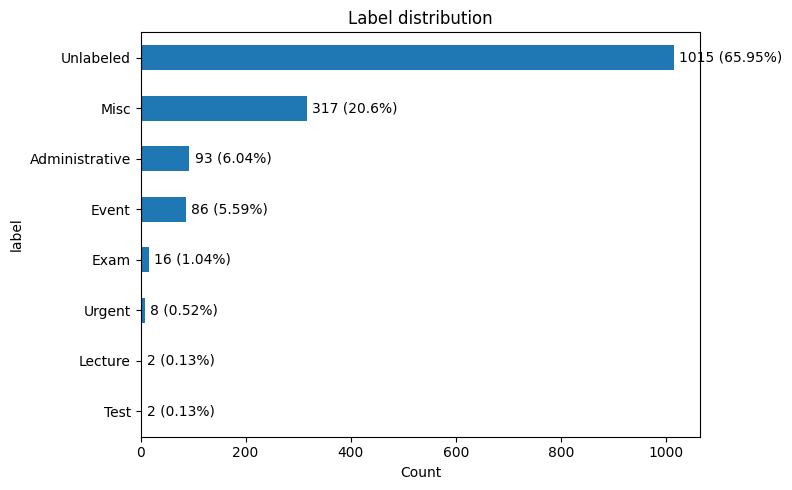

In [10]:
# show distribution of labels (counts + percentages) and plot a horizontal bar chart
label_series = df['label'].fillna('Unlabeled')
counts = label_series.value_counts()
percents = label_series.value_counts(normalize=True).mul(100).round(2)
dist = pd.concat([counts, percents], axis=1, keys=['count', 'percent'])
print(dist)

import matplotlib.pyplot as plt

counts_sorted = counts.sort_values(ascending=True)
plt.figure(figsize=(8, 5))
ax = counts_sorted.plot(kind='barh', color='C0')
plt.xlabel('Count')
plt.title('Label distribution')
# annotate counts on bars
for i, (idx, v) in enumerate(counts_sorted.items()):
    ax.text(v + max(counts_sorted) * 0.01, i, f"{v} ({dist.loc[idx,'percent']}%)", va='center')
plt.tight_layout()
plt.show()